# Figures for the masters

In [53]:
import Plots as plt
import StatsFuns.logistic as logistic
using BenchmarkTools: @btime, @benchmark

## Activation Functions

In [184]:
sigmoid(x) = 1.0 / (1.0 + exp(-x))
ReLU(x) = max(zero(x), x)

ReLU (generic function with 1 method)

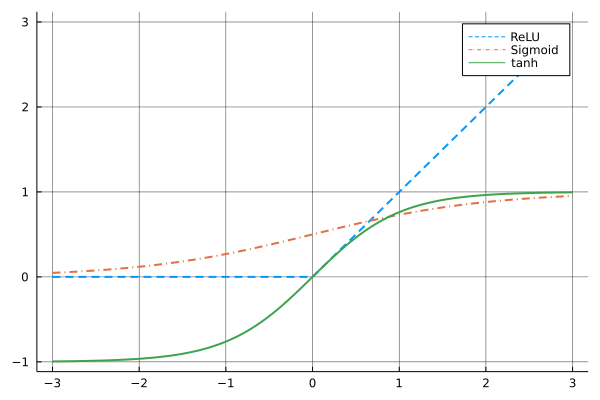

In [207]:
x = -3:0.01:3

plt.plot(x, ReLU.(x), label="ReLU", lw= 2, linestyle=:dash)
plt.plot!(x, sigmoid.(x), label="Sigmoid", lw= 2, linestyle=:dashdot)
plt.plot!(x, tanh.(x), label="tanh", lw= 2)

fig = plt.plot!(gridalpha=0.8)

In [209]:
plt.savefig(fig, "Figures/activation_funcs")

## Finding sensible parameters for height/weight model

In [143]:
import Pandas as pd

In [146]:
df = pd.read_csv("Figures/SOCR-HeightWeight.csv");

In [162]:
height = Float64.(df["Height(Inches)"]);
height *= 2.54
weight = Float64.(df["Weight(Pounds)"]);
weight *= 0.453592;

In [182]:
(0.8+3.2) * 170 - 80

600.0

In [181]:
0.5 * (56 - 60)^2

8.0

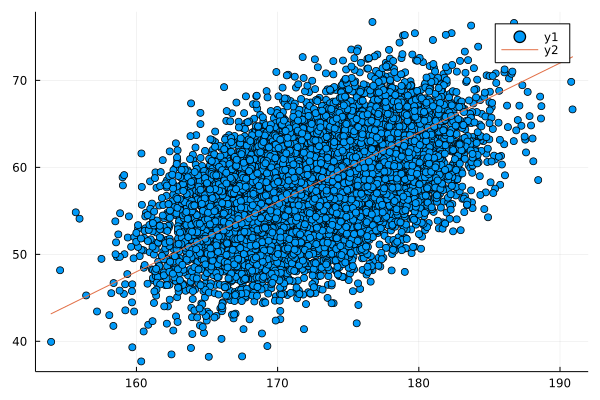

In [177]:
x = height[1:10000]
plt.scatter(height[1:10000], weight[1:10000])
plt.plot!(x, -80 .+ x.*0.8)

## Matrix derivative mess

In [211]:
import ReverseDiff as rd

In [224]:
x = rand(2);

In [214]:
fun1(A) = A * x

fun1 (generic function with 1 method)

In [225]:
A = rand(3,2);

In [229]:
dif = rd.jacobian(fun1, A)

3×6 Matrix{Float64}:
 0.300674  0.0       0.0       0.465003  0.0       0.0
 0.0       0.300674  0.0       0.0       0.465003  0.0
 0.0       0.0       0.300674  0.0       0.0       0.465003

In [227]:
x

2-element Vector{Float64}:
 0.3006741697664752
 0.46500261361186057

In [228]:
g = rand(3)

3-element Vector{Float64}:
 0.7894289227848836
 0.45961400116255646
 0.12632472325206412

In [232]:
transpose(dif) * g

6-element Vector{Float64}:
 0.23736088594798774
 0.13819405821259945
 0.03798258128479413
 0.36708651235576656
 0.2137217117931935
 0.05874132647600479